# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = '../data/train.p'
validation_file = '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

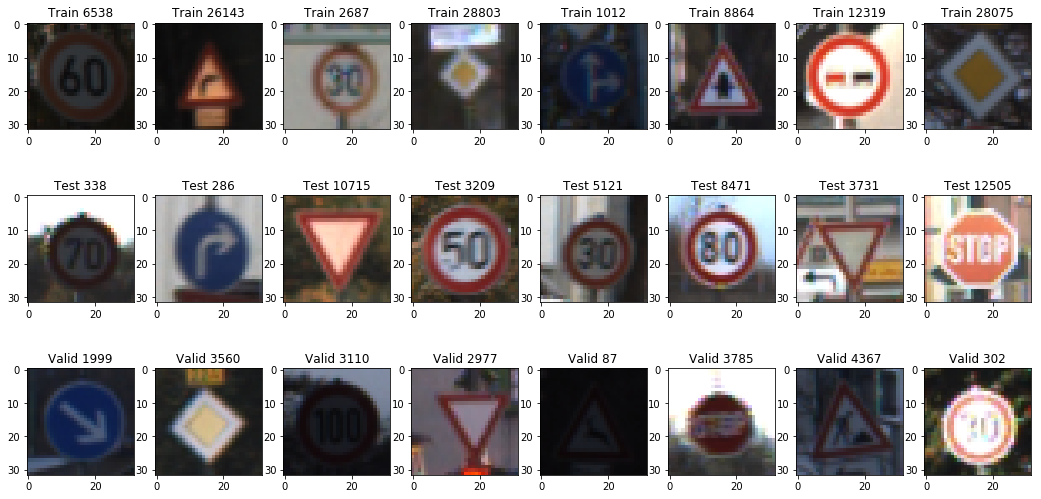

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Display some random images.
row_images = 8
random_train_idx = np.random.randint(0, n_train, row_images)
random_test_idx = np.random.randint(0, n_test, row_images)
random_valid_idx = np.random.randint(0, n_validation, row_images)
all_idx = np.concatenate([random_train_idx, random_test_idx, random_valid_idx])

plt.figure(figsize=(18, 9))
plot_id = 0
for idx in all_idx:
    plt.subplot(3, row_images, plot_id+1)
    if plot_id // row_images == 0:
        img = X_train[idx]
        plt.title('Train %d' % idx)
    elif plot_id // row_images == 1:
        img = X_test[idx]
        plt.title('Test %d' % idx)
    else:
        img = X_valid[idx]
        plt.title('Valid %d' % idx)
    plt.imshow(img)
    plot_id += 1

plt.show()

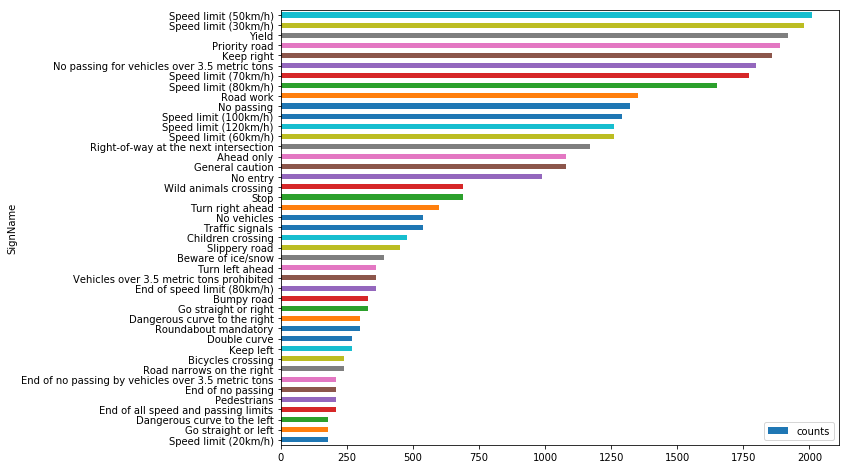

In [4]:
# Count of each sign
import pandas as pd
plt.rcParams['figure.figsize'] = [10, 8]
signames = pd.read_csv('signnames.csv')
label, counts = np.unique(y_train, return_counts=True)
label_count = pd.DataFrame({'ClassId': label, 'counts': counts})
label_count = label_count.merge(signames)
label_count.sort_values('counts', ascending=True, inplace=True)
label_count.plot.barh(x='SignName', y='counts', rot=0)

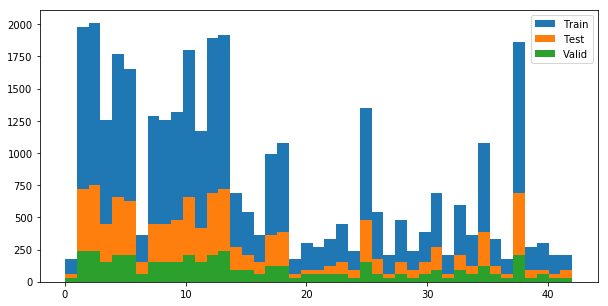

In [5]:
# Histogram of signs
plt.figure(figsize=(10,5))
_ = plt.hist(y_train, bins=n_classes, label="Train")
_ = plt.hist(y_test, bins=n_classes, label="Test")
_ = plt.hist(y_valid, bins=n_classes, label="Valid")
plt.legend()
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def normalize_images(X):
    return (X - 128.0) / 128.0

X_train_norm = normalize_images(X_train)
X_test_norm = normalize_images(X_test)
X_valid_norm = normalize_images(X_valid)

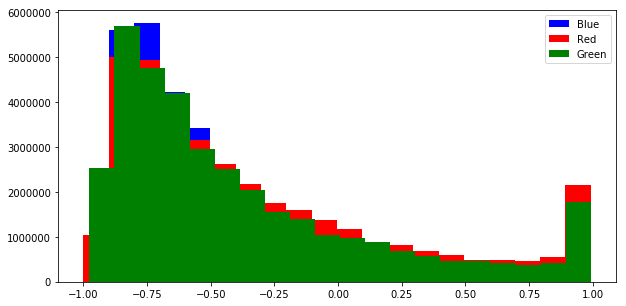

In [7]:
R = X_train_norm[:, :, :, 0]
G = X_train_norm[:, :, :, 1]
B = X_train_norm[:, :, :, 2]
plt.figure(figsize=(10,5))
plt.hist(B.flatten(), 20, label='Blue', color='blue')
plt.hist(R.flatten(), 20, label='Red', color='red')
plt.hist(G.flatten(), 20, label='Green', color='green')
plt.legend()
plt.show()

### Model Architecture

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

# params x: a tensor of 32x32x1
def LeNet(x, n_classes):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1 = tf.nn.conv2d(input=x, filter=tf.Variable(tf.truncated_normal(shape=[5, 5, 3, 6], mean=mu, stddev=sigma)),
                         strides=[1, 1, 1, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, tf.Variable(tf.zeros([6])))
    
    # Activation.
    a1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    p1 = tf.nn.max_pool(a1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = tf.nn.conv2d(input=p1, filter=tf.Variable(tf.truncated_normal(shape=[5, 5, 6, 16], mean=mu, stddev=sigma)),
                         strides=[1, 1, 1, 1], padding='VALID')
    conv2 = tf.nn.bias_add(conv2, tf.Variable(tf.zeros([16])))
    
    # Activation.
    a2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    p2 = tf.nn.max_pool(a2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    # Flatten. Input = 5x5x16. Output = 400.
    # f1 = tf.reshape(p2, [-1, 400])
    f1 = flatten(p2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(f1, tf.Variable(tf.truncated_normal(shape=[400, 120], mean=mu, stddev=sigma))),
                 tf.Variable(tf.zeros([120])))
    
    # Activation.
    fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, tf.Variable(tf.truncated_normal(shape=[120, 84], mean=mu, stddev=sigma))),
                 tf.Variable(tf.zeros([84])))
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob=0.5)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes.
    logits = tf.add(tf.matmul(fc2, tf.Variable(tf.truncated_normal(shape=[84, n_classes], mean=mu, stddev=sigma))),
                    tf.Variable(tf.random_normal([n_classes])))
    
    return logits

In [9]:
# Build the training operator.

BATCH_SIZE = 128
learning_rate = 0.001

tf.reset_default_graph()  # Must be called before restoring the graph from saved model.

x = tf.placeholder(tf.float32, (None, 32, 32, 3), name='InputImgX')
y = tf.placeholder(tf.int32, (None), name='LableY')
one_hot_y = tf.one_hot(y, n_classes)

logits = LeNet(x, n_classes)
softmax = tf.nn.softmax(logits, name='softmax_lenet')
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

# Build the accuracy operator.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy_lenet')
tf.add_to_collection('accuracy_op', accuracy_operation)
tf.add_to_collection('softmax_op', softmax)
tf.add_to_collection('logits_op', logits)

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model


A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

from tqdm import tqdm
from sklearn.utils import shuffle

EPOCHS = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_norm)
    
    print("Training...")
    for i in range(EPOCHS):
        X_train_shuffled, y_train_shuffled = shuffle(X_train_norm, y_train)
        for offset in tqdm(range(0, num_examples, BATCH_SIZE)):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_shuffled[offset:end], y_train_shuffled[offset:end]
            _, loss = sess.run([training_operation, loss_operation], feed_dict={x: batch_x, y: batch_y})

        train_accuracy = evaluate(X_train_shuffled, y_train_shuffled)
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        print("EPOCH {}:".format(i+1),
              "Loss = {:.3f}".format(loss),
              "Training Accuracy = {:.3f}".format(train_accuracy),
              "Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

    saver.save(sess, './lenet')
    print("Model saved")

Training...


100%|██████████| 272/272 [00:04<00:00, 57.47it/s] 


EPOCH 1: Loss = 1.241 Training Accuracy = 0.629 Validation Accuracy = 0.556


100%|██████████| 272/272 [00:02<00:00, 115.16it/s]


EPOCH 2: Loss = 0.443 Training Accuracy = 0.831 Validation Accuracy = 0.755


100%|██████████| 272/272 [00:02<00:00, 117.67it/s]


EPOCH 3: Loss = 0.289 Training Accuracy = 0.886 Validation Accuracy = 0.810


100%|██████████| 272/272 [00:02<00:00, 116.72it/s]


EPOCH 4: Loss = 0.351 Training Accuracy = 0.909 Validation Accuracy = 0.830


100%|██████████| 272/272 [00:02<00:00, 116.16it/s]


EPOCH 5: Loss = 0.463 Training Accuracy = 0.936 Validation Accuracy = 0.866


100%|██████████| 272/272 [00:02<00:00, 116.74it/s]


EPOCH 6: Loss = 0.121 Training Accuracy = 0.947 Validation Accuracy = 0.861


100%|██████████| 272/272 [00:02<00:00, 117.11it/s]


EPOCH 7: Loss = 0.212 Training Accuracy = 0.957 Validation Accuracy = 0.869


100%|██████████| 272/272 [00:02<00:00, 117.68it/s]


EPOCH 8: Loss = 0.144 Training Accuracy = 0.959 Validation Accuracy = 0.882


100%|██████████| 272/272 [00:02<00:00, 118.06it/s]


EPOCH 9: Loss = 0.157 Training Accuracy = 0.965 Validation Accuracy = 0.882


100%|██████████| 272/272 [00:02<00:00, 117.45it/s]


EPOCH 10: Loss = 0.092 Training Accuracy = 0.973 Validation Accuracy = 0.896


100%|██████████| 272/272 [00:02<00:00, 116.54it/s]


EPOCH 11: Loss = 0.184 Training Accuracy = 0.972 Validation Accuracy = 0.892


100%|██████████| 272/272 [00:02<00:00, 115.47it/s]


EPOCH 12: Loss = 0.060 Training Accuracy = 0.977 Validation Accuracy = 0.900


100%|██████████| 272/272 [00:02<00:00, 115.73it/s]


EPOCH 13: Loss = 0.143 Training Accuracy = 0.977 Validation Accuracy = 0.894


100%|██████████| 272/272 [00:02<00:00, 117.42it/s]


EPOCH 14: Loss = 0.047 Training Accuracy = 0.976 Validation Accuracy = 0.900


100%|██████████| 272/272 [00:02<00:00, 116.80it/s]


EPOCH 15: Loss = 0.052 Training Accuracy = 0.981 Validation Accuracy = 0.916


100%|██████████| 272/272 [00:02<00:00, 116.83it/s]


EPOCH 16: Loss = 0.029 Training Accuracy = 0.982 Validation Accuracy = 0.907


100%|██████████| 272/272 [00:02<00:00, 116.71it/s]


EPOCH 17: Loss = 0.016 Training Accuracy = 0.985 Validation Accuracy = 0.910


100%|██████████| 272/272 [00:02<00:00, 117.63it/s]


EPOCH 18: Loss = 0.087 Training Accuracy = 0.982 Validation Accuracy = 0.907


100%|██████████| 272/272 [00:02<00:00, 117.15it/s]


EPOCH 19: Loss = 0.077 Training Accuracy = 0.986 Validation Accuracy = 0.914


100%|██████████| 272/272 [00:02<00:00, 119.39it/s]


EPOCH 20: Loss = 0.072 Training Accuracy = 0.989 Validation Accuracy = 0.919


100%|██████████| 272/272 [00:02<00:00, 118.45it/s]


EPOCH 21: Loss = 0.045 Training Accuracy = 0.988 Validation Accuracy = 0.924


100%|██████████| 272/272 [00:02<00:00, 119.95it/s]


EPOCH 22: Loss = 0.054 Training Accuracy = 0.987 Validation Accuracy = 0.917


100%|██████████| 272/272 [00:02<00:00, 119.26it/s]


EPOCH 23: Loss = 0.015 Training Accuracy = 0.990 Validation Accuracy = 0.923


100%|██████████| 272/272 [00:02<00:00, 117.15it/s]


EPOCH 24: Loss = 0.011 Training Accuracy = 0.989 Validation Accuracy = 0.921


100%|██████████| 272/272 [00:02<00:00, 118.76it/s]


EPOCH 25: Loss = 0.028 Training Accuracy = 0.990 Validation Accuracy = 0.920


100%|██████████| 272/272 [00:02<00:00, 119.06it/s]


EPOCH 26: Loss = 0.065 Training Accuracy = 0.988 Validation Accuracy = 0.922


100%|██████████| 272/272 [00:02<00:00, 119.09it/s]


EPOCH 27: Loss = 0.040 Training Accuracy = 0.990 Validation Accuracy = 0.927


100%|██████████| 272/272 [00:02<00:00, 119.03it/s]


EPOCH 28: Loss = 0.124 Training Accuracy = 0.988 Validation Accuracy = 0.914


100%|██████████| 272/272 [00:02<00:00, 119.17it/s]


EPOCH 29: Loss = 0.027 Training Accuracy = 0.991 Validation Accuracy = 0.923


100%|██████████| 272/272 [00:02<00:00, 120.61it/s]


EPOCH 30: Loss = 0.041 Training Accuracy = 0.992 Validation Accuracy = 0.920


100%|██████████| 272/272 [00:02<00:00, 120.67it/s]


EPOCH 31: Loss = 0.066 Training Accuracy = 0.994 Validation Accuracy = 0.932


100%|██████████| 272/272 [00:02<00:00, 122.25it/s]


EPOCH 32: Loss = 0.023 Training Accuracy = 0.991 Validation Accuracy = 0.921


100%|██████████| 272/272 [00:02<00:00, 121.67it/s]


EPOCH 33: Loss = 0.011 Training Accuracy = 0.993 Validation Accuracy = 0.932


100%|██████████| 272/272 [00:02<00:00, 120.69it/s]


EPOCH 34: Loss = 0.015 Training Accuracy = 0.992 Validation Accuracy = 0.935


100%|██████████| 272/272 [00:02<00:00, 120.62it/s]


EPOCH 35: Loss = 0.017 Training Accuracy = 0.993 Validation Accuracy = 0.933


100%|██████████| 272/272 [00:02<00:00, 121.01it/s]


EPOCH 36: Loss = 0.007 Training Accuracy = 0.995 Validation Accuracy = 0.934


100%|██████████| 272/272 [00:02<00:00, 121.63it/s]


EPOCH 37: Loss = 0.004 Training Accuracy = 0.994 Validation Accuracy = 0.938


100%|██████████| 272/272 [00:02<00:00, 121.83it/s]


EPOCH 38: Loss = 0.014 Training Accuracy = 0.991 Validation Accuracy = 0.923


100%|██████████| 272/272 [00:02<00:00, 121.70it/s]


EPOCH 39: Loss = 0.007 Training Accuracy = 0.995 Validation Accuracy = 0.931


100%|██████████| 272/272 [00:02<00:00, 121.44it/s]


EPOCH 40: Loss = 0.019 Training Accuracy = 0.993 Validation Accuracy = 0.925


100%|██████████| 272/272 [00:02<00:00, 121.86it/s]


EPOCH 41: Loss = 0.002 Training Accuracy = 0.996 Validation Accuracy = 0.932


100%|██████████| 272/272 [00:02<00:00, 122.22it/s]


EPOCH 42: Loss = 0.010 Training Accuracy = 0.995 Validation Accuracy = 0.926


100%|██████████| 272/272 [00:02<00:00, 122.13it/s]


EPOCH 43: Loss = 0.006 Training Accuracy = 0.993 Validation Accuracy = 0.930


100%|██████████| 272/272 [00:02<00:00, 122.34it/s]


EPOCH 44: Loss = 0.000 Training Accuracy = 0.995 Validation Accuracy = 0.926


100%|██████████| 272/272 [00:02<00:00, 120.82it/s]


EPOCH 45: Loss = 0.002 Training Accuracy = 0.996 Validation Accuracy = 0.939


100%|██████████| 272/272 [00:02<00:00, 119.94it/s]


EPOCH 46: Loss = 0.005 Training Accuracy = 0.997 Validation Accuracy = 0.942


100%|██████████| 272/272 [00:02<00:00, 120.67it/s]


EPOCH 47: Loss = 0.039 Training Accuracy = 0.996 Validation Accuracy = 0.939


100%|██████████| 272/272 [00:02<00:00, 120.80it/s]


EPOCH 48: Loss = 0.001 Training Accuracy = 0.997 Validation Accuracy = 0.941


100%|██████████| 272/272 [00:02<00:00, 121.30it/s]


EPOCH 49: Loss = 0.019 Training Accuracy = 0.996 Validation Accuracy = 0.941


100%|██████████| 272/272 [00:02<00:00, 121.71it/s]


EPOCH 50: Loss = 0.018 Training Accuracy = 0.996 Validation Accuracy = 0.939


100%|██████████| 272/272 [00:02<00:00, 120.31it/s]


EPOCH 51: Loss = 0.003 Training Accuracy = 0.994 Validation Accuracy = 0.940


100%|██████████| 272/272 [00:02<00:00, 120.92it/s]


EPOCH 52: Loss = 0.009 Training Accuracy = 0.997 Validation Accuracy = 0.940


100%|██████████| 272/272 [00:02<00:00, 121.83it/s]


EPOCH 53: Loss = 0.000 Training Accuracy = 0.996 Validation Accuracy = 0.934


100%|██████████| 272/272 [00:02<00:00, 120.27it/s]


EPOCH 54: Loss = 0.002 Training Accuracy = 0.996 Validation Accuracy = 0.940


100%|██████████| 272/272 [00:02<00:00, 121.99it/s]


EPOCH 55: Loss = 0.004 Training Accuracy = 0.997 Validation Accuracy = 0.951


100%|██████████| 272/272 [00:02<00:00, 121.04it/s]


EPOCH 56: Loss = 0.000 Training Accuracy = 0.997 Validation Accuracy = 0.941


100%|██████████| 272/272 [00:02<00:00, 121.79it/s]


EPOCH 57: Loss = 0.000 Training Accuracy = 0.997 Validation Accuracy = 0.950


100%|██████████| 272/272 [00:02<00:00, 120.78it/s]


EPOCH 58: Loss = 0.022 Training Accuracy = 0.997 Validation Accuracy = 0.949


100%|██████████| 272/272 [00:02<00:00, 120.67it/s]


EPOCH 59: Loss = 0.010 Training Accuracy = 0.996 Validation Accuracy = 0.941


100%|██████████| 272/272 [00:02<00:00, 122.14it/s]


EPOCH 60: Loss = 0.013 Training Accuracy = 0.997 Validation Accuracy = 0.947


100%|██████████| 272/272 [00:02<00:00, 121.98it/s]


EPOCH 61: Loss = 0.002 Training Accuracy = 0.997 Validation Accuracy = 0.943


100%|██████████| 272/272 [00:02<00:00, 122.18it/s]


EPOCH 62: Loss = 0.001 Training Accuracy = 0.997 Validation Accuracy = 0.936


100%|██████████| 272/272 [00:02<00:00, 119.32it/s]


EPOCH 63: Loss = 0.003 Training Accuracy = 0.998 Validation Accuracy = 0.945


100%|██████████| 272/272 [00:02<00:00, 120.59it/s]


EPOCH 64: Loss = 0.002 Training Accuracy = 0.989 Validation Accuracy = 0.935


100%|██████████| 272/272 [00:02<00:00, 120.73it/s]


EPOCH 65: Loss = 0.001 Training Accuracy = 0.995 Validation Accuracy = 0.940


100%|██████████| 272/272 [00:02<00:00, 120.76it/s]


EPOCH 66: Loss = 0.003 Training Accuracy = 0.997 Validation Accuracy = 0.942


100%|██████████| 272/272 [00:02<00:00, 121.80it/s]


EPOCH 67: Loss = 0.019 Training Accuracy = 0.997 Validation Accuracy = 0.939


100%|██████████| 272/272 [00:02<00:00, 121.83it/s]


EPOCH 68: Loss = 0.013 Training Accuracy = 0.995 Validation Accuracy = 0.934


100%|██████████| 272/272 [00:02<00:00, 121.74it/s]


EPOCH 69: Loss = 0.024 Training Accuracy = 0.997 Validation Accuracy = 0.945


100%|██████████| 272/272 [00:02<00:00, 121.95it/s]


EPOCH 70: Loss = 0.047 Training Accuracy = 0.995 Validation Accuracy = 0.935


100%|██████████| 272/272 [00:02<00:00, 121.31it/s]


EPOCH 71: Loss = 0.000 Training Accuracy = 0.998 Validation Accuracy = 0.948


100%|██████████| 272/272 [00:02<00:00, 121.75it/s]


EPOCH 72: Loss = 0.004 Training Accuracy = 0.998 Validation Accuracy = 0.944


100%|██████████| 272/272 [00:02<00:00, 121.52it/s]


EPOCH 73: Loss = 0.009 Training Accuracy = 0.998 Validation Accuracy = 0.941


100%|██████████| 272/272 [00:02<00:00, 122.62it/s]


EPOCH 74: Loss = 0.034 Training Accuracy = 0.997 Validation Accuracy = 0.944


100%|██████████| 272/272 [00:02<00:00, 124.52it/s]


EPOCH 75: Loss = 0.004 Training Accuracy = 0.996 Validation Accuracy = 0.938


100%|██████████| 272/272 [00:02<00:00, 117.96it/s]


EPOCH 76: Loss = 0.000 Training Accuracy = 0.998 Validation Accuracy = 0.940


100%|██████████| 272/272 [00:02<00:00, 124.90it/s]


EPOCH 77: Loss = 0.052 Training Accuracy = 0.998 Validation Accuracy = 0.941


100%|██████████| 272/272 [00:02<00:00, 123.90it/s]


EPOCH 78: Loss = 0.000 Training Accuracy = 0.997 Validation Accuracy = 0.937


100%|██████████| 272/272 [00:02<00:00, 124.29it/s]


EPOCH 79: Loss = 0.001 Training Accuracy = 0.996 Validation Accuracy = 0.944


100%|██████████| 272/272 [00:02<00:00, 124.30it/s]


EPOCH 80: Loss = 0.023 Training Accuracy = 0.995 Validation Accuracy = 0.940


100%|██████████| 272/272 [00:02<00:00, 123.70it/s]


EPOCH 81: Loss = 0.000 Training Accuracy = 0.997 Validation Accuracy = 0.944


100%|██████████| 272/272 [00:02<00:00, 127.43it/s]


EPOCH 82: Loss = 0.001 Training Accuracy = 0.998 Validation Accuracy = 0.954


100%|██████████| 272/272 [00:02<00:00, 125.70it/s]


EPOCH 83: Loss = 0.000 Training Accuracy = 0.998 Validation Accuracy = 0.944


100%|██████████| 272/272 [00:02<00:00, 124.24it/s]


EPOCH 84: Loss = 0.002 Training Accuracy = 0.996 Validation Accuracy = 0.934


100%|██████████| 272/272 [00:02<00:00, 124.67it/s]


EPOCH 85: Loss = 0.002 Training Accuracy = 0.995 Validation Accuracy = 0.940


100%|██████████| 272/272 [00:02<00:00, 122.12it/s]


EPOCH 86: Loss = 0.001 Training Accuracy = 0.998 Validation Accuracy = 0.941


100%|██████████| 272/272 [00:02<00:00, 122.39it/s]


EPOCH 87: Loss = 0.001 Training Accuracy = 0.997 Validation Accuracy = 0.946


100%|██████████| 272/272 [00:02<00:00, 122.54it/s]


EPOCH 88: Loss = 0.004 Training Accuracy = 0.998 Validation Accuracy = 0.947


100%|██████████| 272/272 [00:02<00:00, 122.07it/s]


EPOCH 89: Loss = 0.006 Training Accuracy = 0.998 Validation Accuracy = 0.945


100%|██████████| 272/272 [00:02<00:00, 120.19it/s]


EPOCH 90: Loss = 0.007 Training Accuracy = 0.998 Validation Accuracy = 0.946


100%|██████████| 272/272 [00:02<00:00, 119.36it/s]


EPOCH 91: Loss = 0.003 Training Accuracy = 0.999 Validation Accuracy = 0.955


100%|██████████| 272/272 [00:02<00:00, 120.06it/s]


EPOCH 92: Loss = 0.000 Training Accuracy = 0.999 Validation Accuracy = 0.951


100%|██████████| 272/272 [00:02<00:00, 123.84it/s]


EPOCH 93: Loss = 0.023 Training Accuracy = 0.997 Validation Accuracy = 0.944


100%|██████████| 272/272 [00:02<00:00, 123.15it/s]


EPOCH 94: Loss = 0.000 Training Accuracy = 0.997 Validation Accuracy = 0.938


100%|██████████| 272/272 [00:02<00:00, 121.32it/s]


EPOCH 95: Loss = 0.040 Training Accuracy = 0.998 Validation Accuracy = 0.941


100%|██████████| 272/272 [00:02<00:00, 121.80it/s]


EPOCH 96: Loss = 0.004 Training Accuracy = 0.998 Validation Accuracy = 0.942


100%|██████████| 272/272 [00:02<00:00, 122.38it/s]


EPOCH 97: Loss = 0.000 Training Accuracy = 0.998 Validation Accuracy = 0.948


100%|██████████| 272/272 [00:02<00:00, 121.87it/s]


EPOCH 98: Loss = 0.001 Training Accuracy = 0.997 Validation Accuracy = 0.948


100%|██████████| 272/272 [00:02<00:00, 121.88it/s]


EPOCH 99: Loss = 0.001 Training Accuracy = 0.998 Validation Accuracy = 0.945


100%|██████████| 272/272 [00:02<00:00, 122.68it/s]


EPOCH 100: Loss = 0.000 Training Accuracy = 0.998 Validation Accuracy = 0.951
Test Accuracy = 0.928
Model saved


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

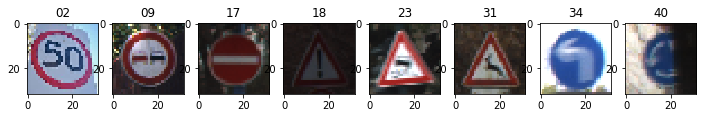

In [2]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.figure(figsize=(12, 2))

dir_name = 'test_images'
files = []
for filename in os.listdir(dir_name):
    if filename.endswith('ppm') or filename.endswith('jpg') or filename.endswith('jpeg') or filename.endswith('png'):
        files.append(filename)
n_files = len(files)
files.sort()
test_images = []
test_image_truth = []
test_image_paths = []
for i, filename in enumerate(files):
    filepath = os.path.join(dir_name, filename)
    test_image_paths.append(filepath)
    im = Image.open(filepath).resize((32, 32))
    plt.subplot(1, n_files, i+1)
    true_class = filename.split('.')[0]
    plt.title(true_class)
    plt.imshow(im)
    data = np.asarray(im)
    test_images.append(data)
    test_image_truth.append(int(true_class))
test_images = np.stack(test_images, 0)
test_image_truth = np.array(test_image_truth)
plt.show()

### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Load the model and test the performance.

import pickle
import tensorflow as tf
print(tf.__version__)

def load_data(filename):
    with open(filename, mode='rb') as f:
        test = pickle.load(f)

    X, y = test['features'], test['labels']
    X_norm = (X - 128.0) / 128.0
    return X_norm, y

X_test_norm, y_test = load_data('../data/test.p')
X_valid_norm, y_valid = load_data('../data/valid.p')

def evaluate_loaded_model(X_data, y_data, BATCH_SIZE=128):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy_op = tf.get_collection('accuracy_op')[0]
        accuracy = sess.run(accuracy_op, feed_dict={'InputImgX:0': batch_x, 'LableY:0': batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Loading the trained model and evaluate on validation and test set.
tf.reset_default_graph()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Restore graph and variables from saved model on disk.
    imported_graph = tf.train.import_meta_graph('lenet.meta')
    saver = tf.train.Saver()
    saver.restore(sess, "lenet")
    test_accuracy = evaluate_loaded_model(X_test_norm, y_test)
    valid_accuracy = evaluate_loaded_model(X_valid_norm, y_valid)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("Validation Accuracy = {:.3f}".format(valid_accuracy))


1.3.0
INFO:tensorflow:Restoring parameters from lenet
Test Accuracy = 0.927
Validation Accuracy = 0.949


INFO:tensorflow:Restoring parameters from lenet
23 Slippery road
9 No passing
17 No entry
18 General caution
23 Slippery road
31 Wild animals crossing
34 Turn left ahead
40 Roundabout mandatory


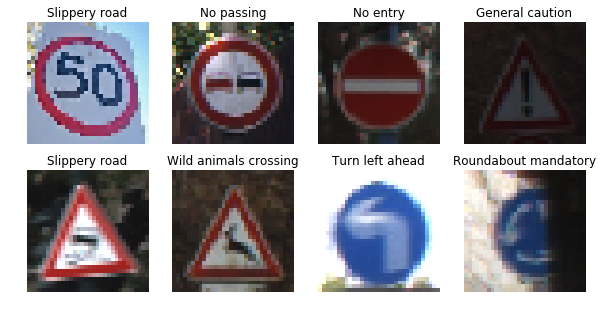

In [4]:
# Run inference on new images

import pandas as pd
%matplotlib inline
plt.figure(figsize=(10, 5))

signames = pd.read_csv('signnames.csv')
signame_mapping = dict(zip(signames.ClassId, signames.SignName))

def inference(image_paths):
    # Load images into a np array as a batch.
    im_data = []
    for filepath in image_paths:
        im = Image.open(filepath).resize((32, 32))
        im_data.append(np.asarray(im))
    batch_x = np.stack(im_data)
    
    # Run inference on the batch data.
    softmax_op = tf.get_collection('softmax_op')[0]
    sess = tf.get_default_session()
    result = sess.run(softmax_op, feed_dict={'InputImgX:0': batch_x})
    predictions = np.argmax(result, 1)
    
    # show images
    n_files = len(image_paths)
    for i in range(n_files):
        pred_class = predictions[i]
        pred_label = signame_mapping[pred_class]
        print(pred_class, pred_label)
        plt.subplot(n_files // 4, 4, i+1)
        plt.title(pred_label)
        plt.axis('off')
        filepath = image_paths[i]
        im = Image.open(filepath).resize((32, 32))
        im_data.append(np.asarray(im))
        plt.imshow(im)
    plt.show()
    return predictions

tf.reset_default_graph()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Restore graph and variables from saved model on disk.
    imported_graph = tf.train.import_meta_graph('lenet.meta')
    saver = tf.train.Saver()
    saver.restore(sess, "lenet")
    prediction = inference(test_image_paths)
    

### Analyze Performance

In [5]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

tf.reset_default_graph()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Restore graph and variables from saved model on disk.
    imported_graph = tf.train.import_meta_graph('lenet.meta')
    saver = tf.train.Saver()
    saver.restore(sess, "lenet")
    inference_accuracy = evaluate_loaded_model(test_images, test_image_truth)
    print("Inference Accuracy on {:d} new images = {:.3f}".format(len(test_images), inference_accuracy))

INFO:tensorflow:Restoring parameters from lenet
Inference Accuracy on 8 new images = 0.875


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [7]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

signames = pd.read_csv('signnames.csv')
signame_mapping = dict(zip(signames.ClassId, signames.SignName))

def prediction_top_k(image_paths):
    # Load images into a np array as a batch.
    im_data = []
    for filepath in image_paths:
        im = Image.open(filepath).resize((32, 32))
        im_data.append(np.asarray(im))
    batch_x = np.stack(im_data)
    
    # Run inference on the batch data.
    softmax_op = tf.get_collection('softmax_op')[0]
    logits_op = tf.get_collection('logits_op')[0]
    sess = tf.get_default_session()
    topk_softmax = tf.nn.top_k(softmax_op, k=5)
    topk_logits_op = tf.nn.top_k(logits_op, k=5)
    topk_softmax_results, topk_logits_results = sess.run(
        [topk_softmax, topk_logits_op], feed_dict={'InputImgX:0': batch_x})
    
    return topk_softmax_results, topk_logits_results

tf.reset_default_graph()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Restore graph and variables from saved model on disk.
    imported_graph = tf.train.import_meta_graph('lenet.meta')
    saver = tf.train.Saver()
    saver.restore(sess, "lenet")
    topk_softmax_results, topk_logits_results = prediction_top_k(test_image_paths)
    print('Top 5 softmax results')
    print(topk_softmax_results)
    print('Top 5 logits results')
    print(topk_logits_results)
    

INFO:tensorflow:Restoring parameters from lenet
Top 5 softmax results
TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[31,  0,  1,  2,  3],
       [ 9,  0,  1,  2,  3],
       [17,  0,  1,  2,  3],
       [18,  0,  1,  2,  3],
       [23,  0,  1,  2,  3],
       [31,  0,  1,  2,  3],
       [34,  0,  1,  2,  3],
       [40,  0,  1,  2,  3]], dtype=int32))
Top 5 logits results
TopKV2(values=array([[   843.19311523,    254.91714478,     14.66727829,  -1485.24060059,
         -1655.02880859],
       [ 12349.40722656,  -2805.61938477,  -3848.00415039,  -4046.9140625 ,
         -5570.66015625],
       [ 11339.296875  ,    805.45062256,  -1389.74169922,  -5665.57128906,
         -6301.11035156],
       [  4045.49194336,   -303

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")